# Diving into KNN modeling

In [56]:
# Import modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsClassifier

# Set aesthetics
%matplotlib inline
sns.set_style('white')
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [57]:
# Load dataset.

df = sns.load_dataset("iris")
print(df.shape)
print(df.dtypes)
df.head()

(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
# Creating target

df['target_cat'] = df['species'].apply(lambda x: 0 if x == 'setosa'
                                       else (1 if x == 'versicolor' else 2))

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target_cat
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


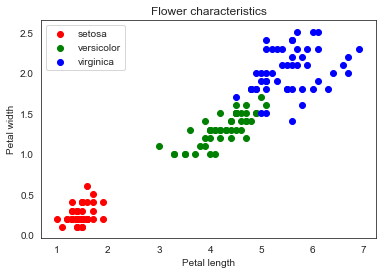

In [60]:
# Visualizing our dataset.

plt.scatter(df[df['target_cat'] == 0].petal_length,
            df[df['target_cat'] == 0].petal_width,
            color='red')

plt.scatter(df[df['target_cat'] == 1].petal_length,
            df[df['target_cat'] == 1].petal_width,
            color='green')

plt.scatter(df[df['target_cat'] == 2].petal_length,
            df[df['target_cat'] == 2].petal_width,
            color='blue')

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('Flower characteristics')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [61]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df.loc[:, 'petal_length':'petal_width']
Y = df.loc[:, 'target_cat']
neighbors.fit(X, Y)

# Predict for a flower with 5 petal length and 1.6 petal width.
print(neighbors.predict([[5, 1.6]]))
print(neighbors.predict_proba([[5, 1.6]]))

[1]
[[0.  0.8 0.2]]


In [64]:
# Converting dataframe to array for mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 50

In [65]:
# Plot the decision boundary. Assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

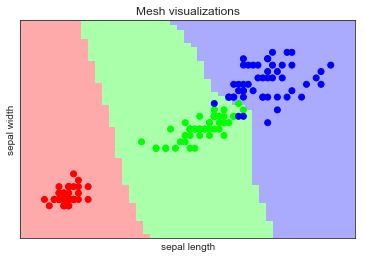

In [66]:
# Put the results into a color plot. 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Add the training points to the plot.
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap_bold)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Mesh visualizations')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Brute-force Nearest Neighbors Algorithm
<br>
Code a nearest neighbor algorithm that works for 2-dimensional data. Test it against SKLearn package on music dataset to ensure accuracy. 

### Manually generated music dataset:

[1]
[[0.4 0.6]]


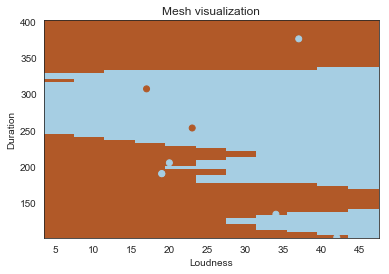

In [47]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

#music.head()

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Attempting KNN

In [ ]:
# KNN

def loadDataset():

def euclideanDistance():
    
def getNeighbors():
    
def getResponse():

def getAccuracy():

def KNN():

In [77]:
import warnings
from collections import Counter

In [78]:
dataset = {'k':[[1,2],[2,3],[3,1],[7,7]],'r':[[6,5],[5,6],[8,6]]}

In [84]:
def knn(dataset,predict,k=3):
    if len(dataset) >= k:
        warnings.warn('k should be smaller than size of dataset')
    distances = []
    for group in dataset:
        for features in dataset[group]:
            e_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([e_dist,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    prediction = Counter(votes).most_common(1)[0][0]
    return prediction

In [85]:
predict = [5,7]
p = knn(dataset,predict,k=3)
print(p)

r
